## <span style="color:#c70d39">**Proyecto Final**</span>
### <span style="color:#c70d39">**Desarrollo de un Modelo de ML para Predecir la Severidad de los Accidentes en USA**</span>

#### <span style="color:#ff5733">**Librerías a utilizar**</span>

In [1]:
#Librerías utilizadas

import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import kaggle
import sqlite3
from sklearn.utils import resample
from scipy.stats import ks_2samp
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport




### <span style="color:#900c3f">**1. Introducción.**</span>

- **Objetivo del Proyecto**. Poner en práctica los principales conceptos aprendidos sobre la Ciencia de Datos y Machine Learning, tomando un conjunto de datos de la vida real y desarrollar un modelo de aplicación para resolver un problema determinado.

- **Descripción del Problema**. El conjunto de datos representa los accidentes automovilísticos de alcance nacional que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilaron desde febrero de 2016 hasta marzo de 2023, utilizando múltiples API que proporcionan datos de incidentes (o eventos) de tráfico en tiempo real. Estas API transmiten datos de tráfico capturados por varias entidades, incluidos los departamentos de transporte de los EE. UU. y los estados, las agencias de aplicación de la ley, las cámaras de tráfico y los sensores de tráfico dentro de las redes de carreteras. El conjunto de datos contiene actualmente aproximadamente 7,7 millones de registros de accidentes. **Para efectos de este estudio solo se trabajará con la data correspondiente al año 2020**. El modelo a considerar consiste en predecir la severidad en los accidentes. En el DataSet existe una variable multiclase (1,2,3,4) llamada Severity, que describe la gravedad del accidente, esta sería el objetivo o target a predecir, por lo cual, el **modelo sería de clasificación tipo multiclase**.

- **Importancia del Problema**. Este modelo predictivo puede permitir a los servicios de emergencia priorizar y asignar recursos de manera más eficiente. Si se predice que un accidente es de alta severidad, se puede enviar ayuda médica y de rescate más rápidamente. En relación a la gestión del tráfico, las autoridades pueden tomar decisiones informadas para desviar el tráfico y evitar congestiones adicionales. Esto es crucial para minimizar el impacto en la red vial y reducir el riesgo de accidentes secundarios.

    - Severidad 1: Indica el menor impacto en el tráfico, es decir, un retraso corto como resultado del accidente.
    - Severidad 2: Impacto moderado en el tráfico.
    - Severidad 3: Impacto significativo en el tráfico.
    - Severidad 4: Indica un impacto considerable en el tráfico, es decir, un retraso largo como resultado del accidente.


### <span style="color:#900c3f">**2. Extracción, Transformación y Carga de Datos (ETL).**</span>

#### <span style="color:#ff5733">**Método de Recolección.**</span>
Se utilizo el API de Kaggle para descargar la información. Instalación del API en el entorno de trabajo (pip install kaggle), y generación de token en archivo .json que contiene usuario y clave cifrada (mover archvio al directorio raíz .kaggle), para poder importar la libreria (import kaggle) y descargar el Dataset. 

            kaggle.api.dataset_download_files('sobhanmoosavi/us-accidents', path='../data/raw/accidents', unzip=True)         



#### <span style="color:#ff5733">**Fuente de Datos.**</span>El Dataset fue seleccionado de la pagina web de Kaggle https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

#### <span style="color:#ff5733">**Descripción de los Datos.**</span>
El Dataset (subconjunto 2020) esta compuesto por 1.178.913 registros y 46 características (incluyendo la clase a predecir). Los tipos de variables están distribuidos de la siguiente manera: bool(13), datetime64, float64(12), int64(1), object(18)

- **ID:** Identificador único del accidente.
- **Source:** Fuente de los datos del accidente.
- **Severity:** Gravedad del accidente (generalmente en una escala del 1 al 4).
- **Start_Time:** Fecha y hora de inicio del accidente.
- **End_Time:** Fecha y hora de finalización del accidente.
- **Start_Lat:** Latitud del punto de inicio del accidente.
- **Start_Lng:** Longitud del punto de inicio del accidente.
- **End_Lat:** Latitud del punto de finalización del accidente.
- **End_Lng:** Longitud del punto de finalización del accidente.
- **Distance(mi):** Distancia en millas del accidente.
- **Description:** Descripción textual del accidente.
- **Street:** Calle donde ocurrió el accidente.
- **City:** Ciudad donde ocurrió el accidente.
- **County:** Condado donde ocurrió el accidente.
- **State:** Estado donde ocurrió el accidente.
- **Zipcode:** Código postal del lugar del accidente.
- **Country:** País donde ocurrió el accidente.
- **Timezone:** Zona horaria del lugar del accidente.
- **Airport_Code:** Código del aeropuerto más cercano al accidente.
- **Weather_Timestamp:** Fecha y hora del reporte meteorológico más cercano al accidente.
- **Temperature(F):** Temperatura en grados Fahrenheit en el momento del accidente.
- **Wind_Chill(F):** Sensación térmica en grados Fahrenheit en el momento del accidente.
- **Humidity(%):** Humedad relativa en el momento del accidente.
- **Pressure(in):** Presión atmosférica en pulgadas en el momento del accidente.
- **Visibility(mi):** Visibilidad en millas en el momento del accidente.
- **Wind_Direction:** Dirección del viento en el momento del accidente.
- **Wind_Speed(mph):** Velocidad del viento en millas por hora en el momento del accidente.
- **Precipitation(in):** Precipitación en pulgadas en el momento del accidente.
- **Weather_Condition:** Condiciones meteorológicas en el momento del accidente.
- **Amenity:** Indica si hay una instalación cercana (True/False).
- **Bump:** Indica si hay un bache cercano (True/False).
- **Crossing:** Indica si hay un cruce cercano (True/False).
- **Give_Way:** Indica si hay una señal de ceder el paso cercana (True/False).
- **Junction:** Indica si hay una intersección cercana (True/False).
- **No_Exit:** Indica si hay una salida cercana (True/False).
- **Railway:** Indica si hay una vía de tren cercana (True/False).
- **Roundabout:** Indica si hay una rotonda cercana (True/False).
- **Station:** Indica si hay una estación cercana (True/False).
- **Stop:** Indica si hay una señal de stop cercana (True/False).
- **Traffic_Calming:** Indica si hay una medida de calmado de tráfico cercana (True/False).
- **Traffic_Signal:** Indica si hay un semáforo cercano (True/False).
- **Turning_Loop:** Indica si hay un bucle de giro cercano (True/False).
- **Sunrise_Sunset:** Indica si el accidente ocurrió durante el amanecer o el atardecer.
- **Civil_Twilight:** Indica si el accidente ocurrió durante el crepúsculo civil.
- **Nautical_Twilight:** Indica si el accidente ocurrió durante el crepúsculo náutico.
- **Astronomical_Twilight:** Indica si el accidente ocurrió durante el crepúsculo astronómico.

**No existen registros duplicados.**

**Seguido se muestran la cantidad de valores nulos por características.**

        End_Lat                  470244
        End_Lng                  470244
        Precipitation(in)         62402
        Wind_Chill(F)             40163
        Wind_Direction            35789
        Wind_Speed(mph)           35761
        Humidity(%)               33234
        Temperature(F)            30964
        Visibility(mi)            30356
        Weather_Condition         29974
        Pressure(in)              25915
        Weather_Timestamp         23759
        Airport_Code               3084
        Timezone                   1343
        Street                      437
        Sunrise_Sunset              377
        Astronomical_Twilight       377
        Nautical_Twilight           377
        Civil_Twilight              377
        Zipcode                     358
        City                         50
        Description                   1

#### <span style="color:#ff5733">**Uso API de Kaggle para descargar y descomprimir DataSet objeto del estudio**</span>

In [2]:
# Configurar las credenciales
home = os.path.expanduser('~')
kaggle_dir = os.path.join(home, '.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)


In [3]:
# Descargar el dataset
# kaggle.api.dataset_download_files('sobhanmoosavi/us-accidents', path='../data/raw/accidents', unzip=True)


In [4]:
data_orig=pd.read_csv('../data/raw/accidents/US_Accidents_March23.csv')

In [5]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

#### <span style="color:#ff5733">**Creando subconjunto data_acc (año 2020) del dataframe original, para usarlo en el desarrollo del proyecto**</span>.

In [6]:
# Vamos a convertir las caracteristicas Start_Time, End_Time, Weather_Timestamp  en variables tipo datetime64
data_orig['Start_Time'] = pd.to_datetime(data_orig['Start_Time'], format='mixed', errors='coerce')
data_orig['End_Time'] = pd.to_datetime(data_orig['End_Time'], format='mixed', errors='coerce')
data_orig['Weather_Timestamp'] = pd.to_datetime(data_orig['Weather_Timestamp'], format='mixed', errors='coerce')

# Crear una nueva columna con el año
data_orig['year'] = data_orig['Start_Time'].dt.year

# Crear una nueva columna con la duraccion del accidente en días
data_orig['dur_acc'] = (data_orig['End_Time']- data_orig['Start_Time']).dt.total_seconds()/86400

# Vamos a crear un dataframe (subconjunto) con la data del año 2023. Este será el dataset a usar en este proyecto.
data_acc=data_orig[data_orig.year==2020]

# Reiniciando los indices
data_acc.reset_index(drop=True, inplace=True)

# Lsitando los primeros 5 registros
data_acc.head()


ID   Source  Severity          Start_Time            End_Time  \
0  A-1189513  Source2         2 2020-12-28 05:55:31 2021-01-18 05:00:00   
1  A-1207989  Source2         3 2020-12-31 22:57:02 2021-01-01 00:29:02   
2  A-1207990  Source2         3 2020-12-31 22:03:27 2021-01-01 01:43:05   
3  A-1207991  Source2         3 2020-12-31 22:58:36 2021-01-01 01:02:45   
4  A-1208128  Source2         2 2020-12-31 23:32:07 2021-01-01 00:51:14   

   Start_Lat   Start_Lng  End_Lat  End_Lng  Distance(mi)  ...   Stop  \
0  39.376530  -74.478561      NaN      NaN          0.46  ...  False   
1  41.932789  -88.038078      NaN      NaN          0.00  ...  False   
2  41.623920  -87.680061      NaN      NaN          0.00  ...  False   
3  41.794476  -87.631599      NaN      NaN          0.00  ...  False   
4  39.771069 -104.847038      NaN      NaN          0.00  ...  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False          False        False          Night          Night   
3           False           True        False          Night          Night   
4           False           True        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  year    dur_acc  
0             Night                   Day  2020  20.961447  
1             Night                 Night  2020   0.063889  
2             Night                 Night  2020   0.152523  
3             Night                 Night  2020   0.086215  
4             Night                 Night  2020   0.054942  

[5 rows x 48 columns]

In [7]:
data_acc.shape

(1178913, 48)

In [8]:
# Detectar registros duplicados
data_acc.duplicated().sum()

0

In [9]:
# Detectar registros nulos
data_acc.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  470244
End_Lng                  470244
Distance(mi)                  0
Description                   1
Street                      437
City                         50
County                        0
State                         0
Zipcode                     358
Country                       0
Timezone                   1343
Airport_Code               3084
Weather_Timestamp         23759
Temperature(F)            30964
Wind_Chill(F)             40163
Humidity(%)               33234
Pressure(in)              25915
Visibility(mi)            30356
Wind_Direction            35789
Wind_Speed(mph)           35761
Precipitation(in)         62402
Weather_Condition         29974
Amenity                       0
Bump                          0
Crossing

#### <span style="color:#ff5733">**Eliminando valores nulos**</span>.

Se toma la desicion de eliminar los valores nulos, dado la cantidad de datos que tenemos para el estudio. Quedando al final 649.322 registros.

In [10]:
data_acc.shape

(1178913, 48)

In [11]:
# Generación DataFrame sin valores nulos

df_acc = data_acc.copy()
df_acc.dropna(axis=0, inplace=True)

In [12]:
# Tamaño del nuevo DataSet

df_acc.shape

(649322, 48)

#### <span style="color:#ff5733">**Balanceo de Clases en Variable a Predecir Severity**</span>.

En la siguiente tabla, se observa el desbalanceo de las clases a predecir, lo cual puede ocasionar un sobre ajuste en el modelo final, para evitar este problema, en la sección de Ingeniería de Características se va a disminuir (resample) todas las clases del target Severity, con lo cual, se tendría un DataSet final balanceado para poder entrenar el modelo adecuadamente y evitar el sesgo hacia alguna de las clases. 

| Severity |  Count  |
|----------|---------|
|    2     | 555.767 |
|    3     |  43.310 |
|    1     |  25.567 |
|    4     |  24.678 |


In [13]:
df_acc['Severity'].value_counts()

Severity
2    555767
3     43310
1     25567
4     24678
Name: count, dtype: int64

In [14]:
df_acc.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

#### <span style="color:#ff5733">**Creación Base de Datos accidents_usa en Sqlite para almacenar la información del dataframe data_acc**</span>

In [15]:
conn = sqlite3.connect('accidentes_usa.db')
cursor_obj = conn.cursor()

In [16]:
### Carga masiva de los registros en la tabla acc_usa
df_acc.to_sql('acc_usa', conn, if_exists='replace', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

In [17]:
### CONSULTA EN Sqlite de las caracteristicas de las columnas de la tabla crime, perteneciente a la base de datos crime_denver.db

conn = sqlite3.connect('accidentes_usa.db')
cursor_obj = conn.cursor()
statement = '''PRAGMA table_info(acc_usa)'''
cursor_obj.execute(statement)

print("Caracteristicas columnas tabla acc_usa")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

Caracteristicas columnas tabla acc_usa
(0, 'ID', 'TEXT', 0, None, 0)
(1, 'Source', 'TEXT', 0, None, 0)
(2, 'Severity', 'INTEGER', 0, None, 0)
(3, 'Start_Time', 'TIMESTAMP', 0, None, 0)
(4, 'End_Time', 'TIMESTAMP', 0, None, 0)
(5, 'Start_Lat', 'REAL', 0, None, 0)
(6, 'Start_Lng', 'REAL', 0, None, 0)
(7, 'End_Lat', 'REAL', 0, None, 0)
(8, 'End_Lng', 'REAL', 0, None, 0)
(9, 'Distance(mi)', 'REAL', 0, None, 0)
(10, 'Description', 'TEXT', 0, None, 0)
(11, 'Street', 'TEXT', 0, None, 0)
(12, 'City', 'TEXT', 0, None, 0)
(13, 'County', 'TEXT', 0, None, 0)
(14, 'State', 'TEXT', 0, None, 0)
(15, 'Zipcode', 'TEXT', 0, None, 0)
(16, 'Country', 'TEXT', 0, None, 0)
(17, 'Timezone', 'TEXT', 0, None, 0)
(18, 'Airport_Code', 'TEXT', 0, None, 0)
(19, 'Weather_Timestamp', 'TIMESTAMP', 0, None, 0)
(20, 'Temperature(F)', 'REAL', 0, None, 0)
(21, 'Wind_Chill(F)', 'REAL', 0, None, 0)
(22, 'Humidity(%)', 'REAL', 0, None, 0)
(23, 'Pressure(in)', 'REAL', 0, None, 0)
(24, 'Visibility(mi)', 'REAL', 0, None, 0)
(25

In [18]:
statement = '''SELECT COUNT(*) FROM acc_usa'''
cursor_obj.execute(statement)

print("Total de Registros en la Tabla acc_usa")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

Total de Registros en la Tabla acc_usa
(649322,)


In [19]:
statement = '''select count(*) from acc_usa where Severity=1'''
cursor_obj.execute(statement)

print("Total registros para Severidad = 1")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)

Total registros para Severidad = 1
(25567,)


In [20]:
statement = '''select * from acc_usa limit(5)'''
cursor_obj.execute(statement)

print("Primeros 5 registros")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)
conn.close

Primeros 5 registros
('A-3714954', 'Source1', 2, '2020-12-30 22:58:00', '2023-01-01 22:44:47', 39.775174, -75.480441, 39.79029, -75.464704, 1.338, 'Construction on I-495 NB near YALE AVE Right lane blocked. Expect delays.', 'I-495 N', 'Wilmington', 'New Castle', 'DE', '19809', 'US', 'US/Eastern', 'KILG', '2020-12-30 22:51:00', 44.0, 37.0, 55.0, 30.01, 10.0, 'SSW', 14.0, 0.0, 'Cloudy', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Night', 'Night', 'Night', 'Night', 2020, 731.9908217592592)
('A-3747055', 'Source1', 2, '2020-10-13 19:19:34', '2022-06-04 13:05:31', 44.728397, -122.25585900000002, 44.728084, -122.254078, 0.09, 'Incident on OR-22 EB near MP 42 Drive with caution.', ' N Santiam Hwy', 'Detroit', 'Marion', 'OR', '97342', 'US', 'US/Pacific', 'KSLE', '2020-10-13 18:56:00', 60.0, 60.0, 64.0, 29.96, 10.0, 'W', 7.0, 0.0, 'Cloudy', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Night', 'Night', 'Day', 'Day', 2020, 598.7402430555555)
('A-3825588', 'Source1', 2, '2020-10-13 19:19:34', '2022-04-15 1

<function Connection.close()>

### <span style="color:#900c3f">**2. Análisis Exploratorio de Datos (EDA).**</span>

#### <span style="color:#ff5733">**Estadísticas Descriptivas.**</span>

- Previamente se había determinado que no existían registros duplicados.
- Los registros nulos fueron eliminados.
- Existen muchas variables realacionadas con el lugar donde ocurrieron los accidentes, de hecho, existen coordenadas para el inicio y el fin del mismo, en los siguientes análisis se tomarán las referidas al inicio, es decir, **Start_Lat y Start_Lng**. Se descartarán de igual manera, otras características asociadas a la ubicación del siniestro: 
    - Street.
    - City.
    - County.
    - State.
    - Zipcode.
    - Country. 
- Se tienen otras características que no están vinculadas a simple vista con la Clase Objetivo Severity, que serán eliminadas del subconjunto final, las mismas son:
    - ID.
    - Source.
    - Star_Time y End_Time (reeemplazadas por su diferencia, la cual llamaremos, dururación del accidente, **dur_acc**).
    - Descripción.
    - Year.
- Dado que nos quedan aún 34 Características incluyendo la clase a predecir (Severity), vamos a apoyarnos en la librería SelectKBest de Sklearn para escoger las mejores características para desarrollar el modelo.



In [21]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649322 entries, 470244 to 1178912
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     649322 non-null  object        
 1   Source                 649322 non-null  object        
 2   Severity               649322 non-null  int64         
 3   Start_Time             649322 non-null  datetime64[ns]
 4   End_Time               649322 non-null  datetime64[ns]
 5   Start_Lat              649322 non-null  float64       
 6   Start_Lng              649322 non-null  float64       
 7   End_Lat                649322 non-null  float64       
 8   End_Lng                649322 non-null  float64       
 9   Distance(mi)           649322 non-null  float64       
 10  Description            649322 non-null  object        
 11  Street                 649322 non-null  object        
 12  City                   649322 non-null  obj

#### <span style="color:#ff5733">**Ubicación de los datos por Severidad en mapa USA.**</span>

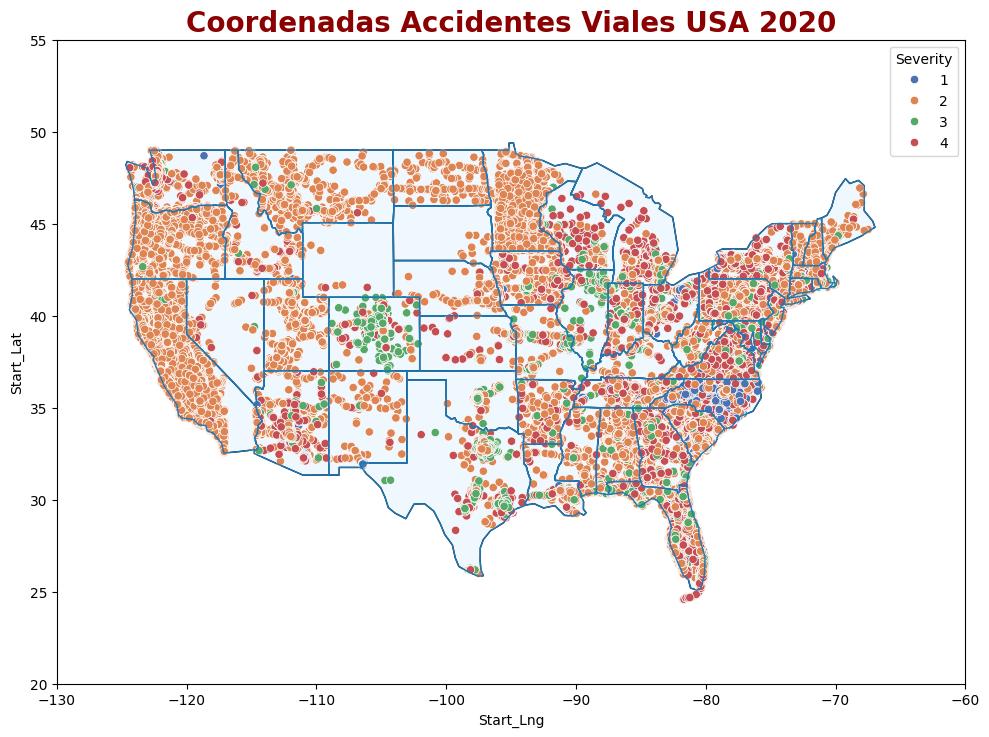

In [22]:
# Ruta al archivo shapefile extraído
shapefile_path = '../data/raw/mapa_usa/ne_110m_admin_1_states_provinces.shp'

# Cargar el shapefile de los Estados Unidos
states = gpd.read_file(shapefile_path)
usa = states[states['admin'] == "United States of America"]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Definiendo límites del mapa para excluir Alaska y Hawaii 
ax.set_xlim(-130, -60)
ax.set_ylim(20, 55)

# Plotear el mapa de USA con los estados
usa.boundary.plot(ax=ax, linewidth=1)
usa.plot(ax=ax, color='aliceblue', edgecolor='black')

# Determinar el número de categorías únicas en 'Severity'
num_cat = df_acc['Severity'].nunique()

# Seleccionar una paleta con el número adecuado de colores
custom_palette = sns.color_palette("deep", num_cat)

# Crear el scatter plot
plt.title('Coordenadas Accidentes Viales USA 2020',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'darkred'})

sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df_acc, palette=custom_palette)
plt.tight_layout()
plt.show()

In [23]:
df_acc.shape

(649322, 48)

In [24]:
car_parciales=['Severity','Start_Lat',
       'Start_Lng','Distance(mi)','Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight','dur_acc']

In [25]:
print(len(car_parciales))

33


#### <span style="color:#ff5733">**SelectKbest para seleccionar mejores características del modelo.**</span>

- La idea de aplicar este técnica es seleccionar, por lo menos, 14 características e iniciar las visualizaciones de la variable objetivo versus cada característica.

- Debemos determinar las estadisticas descriptivas, valores atípicos y otras datos de interés de cada variable.

- Finalmente, la tabla de correlación no datá una guia final para seleccionar las características finales del estudio.

In [26]:
df_par=df_acc[car_parciales]

# Separar las características (X) y la variable objetivo (y)
X = df_par.drop('Severity', axis=1)
y = pd.DataFrame(df_par['Severity'])

In [27]:
X.head()

Start_Lat   Start_Lng  Distance(mi)    Timezone Airport_Code  \
470244  39.775174  -75.480441         1.338  US/Eastern         KILG   
470245  44.728397 -122.255859         0.090  US/Pacific         KSLE   
470246  44.723357 -122.248703         2.675  US/Pacific         KSLE   
470247  39.802550  -75.450548         0.894  US/Eastern         KILG   
470248  39.775174  -75.480441         1.338  US/Eastern         KILG   

        Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
470244            44.0           37.0         55.0         30.01   
470245            60.0           60.0         64.0         29.96   
470246            60.0           60.0         64.0         29.96   
470247            44.0           37.0         55.0         30.01   
470248            44.0           37.0         55.0         30.01   

        Visibility(mi)  ... Station   Stop  Traffic_Calming Traffic_Signal  \
470244            10.0  ...   False  False            False          False   
470245            10.0  ...   False  False            False          False   
470246            10.0  ...   False  False            False          False   
470247            10.0  ...   False  False            False          False   
470248            10.0  ...   False  False            False          False   

        Turning_Loop  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
470244         False           Night           Night              Night   
470245         False           Night           Night                Day   
470246         False           Night           Night                Day   
470247         False           Night           Night              Night   
470248         False           Night           Night              Night   

        Astronomical_Twilight     dur_acc  
470244                  Night  731.990822  
470245                    Day  598.740243  
470246                    Day  548.808125  
470247                  Night  579.517998  
470248                  Night  368.668704  

[5 rows x 32 columns]

##### <span style="color:#FFC30F">**Transformación de Variables Categóricas.**</span>

In [28]:
# Convertir variables categóricas a numéricas usando OrdinalEncoder

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

X.head()


Start_Lat   Start_Lng  Distance(mi)  Timezone  Airport_Code  \
470244  39.775174  -75.480441         1.338       1.0         786.0   
470245  44.728397 -122.255859         0.090       3.0        1409.0   
470246  44.723357 -122.248703         2.675       3.0        1409.0   
470247  39.802550  -75.450548         0.894       1.0         786.0   
470248  39.775174  -75.480441         1.338       1.0         786.0   

        Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
470244            44.0           37.0         55.0         30.01   
470245            60.0           60.0         64.0         29.96   
470246            60.0           60.0         64.0         29.96   
470247            44.0           37.0         55.0         30.01   
470248            44.0           37.0         55.0         30.01   

        Visibility(mi)  ...  Station   Stop  Traffic_Calming  Traffic_Signal  \
470244            10.0  ...    False  False            False           False   
470245            10.0  ...    False  False            False           False   
470246            10.0  ...    False  False            False           False   
470247            10.0  ...    False  False            False           False   
470248            10.0  ...    False  False            False           False   

        Turning_Loop  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
470244         False             1.0             1.0                1.0   
470245         False             1.0             1.0                0.0   
470246         False             1.0             1.0                0.0   
470247         False             1.0             1.0                1.0   
470248         False             1.0             1.0                1.0   

        Astronomical_Twilight     dur_acc  
470244                    1.0  731.990822  
470245                    0.0  598.740243  
470246                    0.0  548.808125  
470247                    1.0  579.517998  
470248                    1.0  368.668704  

[5 rows x 32 columns]

#### <span style="color:#ff5733">**DataSet con mejores Características.**</span>

In [29]:
# Normalizar los datos para que estén en el rango [0, 1], los valores para SelectKbest no pueden ser negativos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Seleccionar las mejores 14 características
selector = SelectKBest(score_func=chi2, k=14)
X_new = selector.fit_transform(X_scaled, y)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [30]:
#Booleanas a Numéricas. En caso de las Booleanas 1 para True y 0 para False. Se agrega la columna Traffic_Signal_n en ambos dataframes X y df_acc 

X['Traffic_Signal_n'], _ = pd.factorize(X['Traffic_Signal'])
df_acc['Traffic_Signal_n'], _ = pd.factorize(df_acc['Traffic_Signal'])
X.head()

Start_Lat   Start_Lng  Distance(mi)  Timezone  Airport_Code  \
470244  39.775174  -75.480441         1.338       1.0         786.0   
470245  44.728397 -122.255859         0.090       3.0        1409.0   
470246  44.723357 -122.248703         2.675       3.0        1409.0   
470247  39.802550  -75.450548         0.894       1.0         786.0   
470248  39.775174  -75.480441         1.338       1.0         786.0   

        Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
470244            44.0           37.0         55.0         30.01   
470245            60.0           60.0         64.0         29.96   
470246            60.0           60.0         64.0         29.96   
470247            44.0           37.0         55.0         30.01   
470248            44.0           37.0         55.0         30.01   

        Visibility(mi)  ...   Stop  Traffic_Calming  Traffic_Signal  \
470244            10.0  ...  False            False           False   
470245            10.0  ...  False            False           False   
470246            10.0  ...  False            False           False   
470247            10.0  ...  False            False           False   
470248            10.0  ...  False            False           False   

        Turning_Loop  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
470244         False             1.0             1.0                1.0   
470245         False             1.0             1.0                0.0   
470246         False             1.0             1.0                0.0   
470247         False             1.0             1.0                1.0   
470248         False             1.0             1.0                1.0   

        Astronomical_Twilight     dur_acc  Traffic_Signal_n  
470244                    1.0  731.990822                 0  
470245                    0.0  598.740243                 0  
470246                    0.0  548.808125                 0  
470247                    1.0  579.517998                 0  
470248                    1.0  368.668704                 0  

[5 rows x 33 columns]

In [31]:
# Vamos a incluir el target 'Severity'
car_best=['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal','Traffic_Signal_n', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight','Severity']

In [32]:
df_sel=df_acc[car_best]

In [33]:
# Al seleccionar estas 15 características (incluyendo el target) se generan 11166 registros duplicado que para efectos del estudio debemos eliminar
df_sel.duplicated().sum()


124269

In [34]:
data_sel=df_sel.copy()
data_sel.drop_duplicates(inplace=True)
data_sel.duplicated().sum()


0

In [35]:
df_sel.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Traffic_Signal_n', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity'],
      dtype='object')

In [36]:
data_sel.shape

(525053, 16)

#### <span style="color:#ff5733">**Revision de Valores Atípicos.**</span>

Variable Temperature(F)


In [37]:
temp=data_sel['Temperature(F)'].describe()
temp_iqr=temp['75%']-temp['25%']
temp_low = temp['25%'] - 1.5 * temp_iqr
temp_upp = temp['75%'] + 1.5 * temp_iqr

print(f'Limite Superior: {temp_upp}, Limite Inferior:{temp_low}, Rango Intercuartilico:{temp_iqr}')


Limite Superior: 109.5, Limite Inferior:9.5, Rango Intercuartilico:25.0


In [38]:
# Si existen, eliminamos valores atípicos segun limites calculados
data_sel = data_sel.loc[(data_sel['Temperature(F)']>temp_low) & (data_sel['Temperature(F)']<temp_upp)]

In [39]:
# Se eliminaron 3608 valores atípicos
data_sel.shape

(521445, 16)

Variable Start_Lat

In [40]:
lat=data_sel['Start_Lat'].describe()
lat_iqr=lat['75%']-lat['25%']
lat_low = lat['25%'] - 1.5 * lat_iqr
lat_upp = lat['75%'] + 1.5 * lat_iqr

print(f'Limite Superior: {lat_upp}, Limite Inferior:{lat_low}, Rango Intercuartilico:{lat_iqr}')


Limite Superior: 49.7796005, Limite Inferior:24.050852500000005, Rango Intercuartilico:6.432186999999999


In [41]:
data_sel = data_sel.loc[(data_sel['Start_Lat']>lat_low) & (data_sel['Start_Lat']<lat_upp)]

In [42]:
# Observamos que no había valores atípicos
data_sel.shape

(521445, 16)

Variable Start_Lng

In [43]:
lng=data_sel['Start_Lng'].describe()
lng_iqr=lng['75%']-lng['25%']
lng_low = lng['25%'] - 1.5 * lng_iqr
lng_upp = lng['75%'] + 1.5 * lng_iqr

print(f'Limite Superior: {lng_upp}, Limite Inferior:{lng_low}, Rango Intercuartilico:{lng_iqr}')


Limite Superior: -23.93417300000003, Limite Inferior:-174.69847699999997, Rango Intercuartilico:37.69107599999998


In [44]:
data_sel = data_sel.loc[(data_sel['Start_Lng']>lng_low) & (data_sel['Start_Lng']<lng_upp)]

In [45]:
# Observamos que no había valores atípicos
data_sel.shape

(521445, 16)

Variable Humidity(%)

In [46]:
hum=data_sel['Humidity(%)'].describe()
hum_iqr = hum['75%']-hum['25%']
hum_low = hum['25%'] - 1.5 * hum_iqr
hum_upp = hum['75%'] + 1.5 * hum_iqr

print(f'Limite Superior: {hum_upp}, Limite Inferior:{hum_low}, Rango Intercuartilico:{hum_iqr}')


Limite Superior: 139.0, Limite Inferior:-5.0, Rango Intercuartilico:36.0


In [47]:
data_sel = data_sel.loc[(data_sel['Humidity(%)']>hum_low) & (data_sel['Humidity(%)']<hum_upp)]

In [48]:
# Observamos que no había valores atípicos
data_sel.shape

(521445, 16)

#### <span style="color:#ff5733">**Balanceo de Clases Variable Severity.**</span>

In [49]:
data_sel['Severity'].value_counts()

Severity
2    442682
3     37081
1     21220
4     20462
Name: count, dtype: int64

In [50]:
data_sel.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Traffic_Signal_n', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity'],
      dtype='object')

In [51]:
# Separando las clases
df_sev_1 = data_sel[data_sel.Severity == 1]
df_sev_2 = data_sel[data_sel.Severity == 2]
df_sev_3 = data_sel[data_sel.Severity == 3]
df_sev_4 = data_sel[data_sel.Severity == 4]

# Submuestreando cada clase a 24.500 registros
df_sev_1_d = resample(df_sev_1, replace=False, n_samples=20400, random_state=42) # para reproducibilidad
df_sev_2_d = resample(df_sev_2, replace=False, n_samples=20400, random_state=42) # para reproducibilidad
df_sev_3_d = resample(df_sev_3, replace=False, n_samples=20400, random_state=42) # para reproducibilidad
df_sev_4_d = resample(df_sev_4, replace=False, n_samples=20400, random_state=42) # para reproducibilidad

# Combinar las clases submuestreadas en un nuevo DataFrame
df_acc_bal = pd.concat([df_sev_1_d, df_sev_2_d, df_sev_3_d, df_sev_4_d])

# Mostrar la distribución de las clases después del submuestreo
print(df_acc_bal['Severity'].value_counts())

Severity
1    20400
2    20400
3    20400
4    20400
Name: count, dtype: int64


In [52]:
df_acc_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81600 entries, 971273 to 718691
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Start_Lat              81600 non-null  float64
 1   Start_Lng              81600 non-null  float64
 2   Timezone               81600 non-null  object 
 3   Temperature(F)         81600 non-null  float64
 4   Humidity(%)            81600 non-null  float64
 5   Wind_Direction         81600 non-null  object 
 6   Weather_Condition      81600 non-null  object 
 7   Crossing               81600 non-null  bool   
 8   Junction               81600 non-null  bool   
 9   Traffic_Signal         81600 non-null  bool   
 10  Traffic_Signal_n       81600 non-null  int64  
 11  Sunrise_Sunset         81600 non-null  object 
 12  Civil_Twilight         81600 non-null  object 
 13  Nautical_Twilight      81600 non-null  object 
 14  Astronomical_Twilight  81600 non-null  object 
 15  S

##### <span style="color:#FFC30F">**Prueba de Hipotesis para determinar si la reducción ha afectado significativamente la representatividad de los datos.**</span>

Para llevar a cabo esta tarea se debe evaluar para cada valor de severidad (1,2,3,4) del conjunto original (649.322 registros) y reducido (24.500 registros), si las características mantienen la misma distribución probabilística en los datos. Las hipotésis a contrastar serían las siguientes:

**Hipótesis Nula (H0)**
- H0: Las distribuciones de la característica en el conjunto de datos original y el conjunto reducido son iguales. No hay diferencia significativa entre las distribuciones. (p_value > 0.05)

**Hipótesis Alternativa (H1)**
- H1: Las distribuciones de la característica en el conjunto de datos original y el conjunto reducido son diferentes. Hay una diferencia significativa entre las distribuciones. (p_value <= 0.05)

En todas las pruebas realizadas con la función **validar_car()**, se observó que no existe evidencia para rechachar la Hipotesis Nula, es decir, noy hay diferencias significativas entre las distribuciones de las características de ambos datasets, para cada valor de Severidad (1,2,3,4).


In [53]:
# Comparar cada característica para Severidad = 1
def validar_car(df_orig,df_red):
    C=0
    for column in df_orig.columns:
        stat, p_value = ks_2samp(df_orig[column], df_red[column])
        if p_value>0.05:
            print(f'La Característica {column} en ambos DataSets son iguales !!! p_value: {p_value:.2f}')
        else:
            print(f'La Característica {column} en ambos DataSets no son iguales XXX p_value: {p_value:.2f}')
            C+=1 
    if C>0:
        print(f'Hay {C} Características que no tienen las mismas distribuciones en ambos DataSets')
    else:
        print("\033[1m\033[4mTODO OK\033[0m")
    return

In [54]:
validar_car(df_sev_1,df_sev_1_d)

La Característica Start_Lat en ambos DataSets son iguales !!! p_value: 1.00
La Característica Start_Lng en ambos DataSets son iguales !!! p_value: 1.00
La Característica Timezone en ambos DataSets son iguales !!! p_value: 1.00
La Característica Temperature(F) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Humidity(%) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Wind_Direction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Weather_Condition en ambos DataSets son iguales !!! p_value: 1.00
La Característica Crossing en ambos DataSets son iguales !!! p_value: 1.00
La Característica Junction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal_n en ambos DataSets son iguales !!! p_value: 1.00
La Característica Sunrise_Sunset en ambos DataSets son iguales !!! p_value: 1.00
La Característica Civil_Twilight en ambos DataSets son

In [55]:
validar_car(df_sev_2,df_sev_2_d)

La Característica Start_Lat en ambos DataSets son iguales !!! p_value: 0.65
La Característica Start_Lng en ambos DataSets son iguales !!! p_value: 0.65
La Característica Timezone en ambos DataSets son iguales !!! p_value: 0.76
La Característica Temperature(F) en ambos DataSets son iguales !!! p_value: 0.06
La Característica Humidity(%) en ambos DataSets son iguales !!! p_value: 0.33
La Característica Wind_Direction en ambos DataSets son iguales !!! p_value: 0.13
La Característica Weather_Condition en ambos DataSets son iguales !!! p_value: 0.58
La Característica Crossing en ambos DataSets son iguales !!! p_value: 0.64
La Característica Junction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal en ambos DataSets son iguales !!! p_value: 0.99
La Característica Traffic_Signal_n en ambos DataSets son iguales !!! p_value: 0.99
La Característica Sunrise_Sunset en ambos DataSets son iguales !!! p_value: 0.44
La Característica Civil_Twilight en ambos DataSets son

In [56]:
validar_car(df_sev_3,df_sev_3_d)

La Característica Start_Lat en ambos DataSets son iguales !!! p_value: 0.42
La Característica Start_Lng en ambos DataSets son iguales !!! p_value: 0.96
La Característica Timezone en ambos DataSets son iguales !!! p_value: 1.00
La Característica Temperature(F) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Humidity(%) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Wind_Direction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Weather_Condition en ambos DataSets son iguales !!! p_value: 0.64
La Característica Crossing en ambos DataSets son iguales !!! p_value: 1.00
La Característica Junction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal_n en ambos DataSets son iguales !!! p_value: 1.00
La Característica Sunrise_Sunset en ambos DataSets son iguales !!! p_value: 1.00
La Característica Civil_Twilight en ambos DataSets son

In [57]:
validar_car(df_sev_4,df_sev_4_d)

La Característica Start_Lat en ambos DataSets son iguales !!! p_value: 1.00
La Característica Start_Lng en ambos DataSets son iguales !!! p_value: 1.00
La Característica Timezone en ambos DataSets son iguales !!! p_value: 1.00
La Característica Temperature(F) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Humidity(%) en ambos DataSets son iguales !!! p_value: 1.00
La Característica Wind_Direction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Weather_Condition en ambos DataSets son iguales !!! p_value: 1.00
La Característica Crossing en ambos DataSets son iguales !!! p_value: 1.00
La Característica Junction en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal en ambos DataSets son iguales !!! p_value: 1.00
La Característica Traffic_Signal_n en ambos DataSets son iguales !!! p_value: 1.00
La Característica Sunrise_Sunset en ambos DataSets son iguales !!! p_value: 1.00
La Característica Civil_Twilight en ambos DataSets son

In [58]:
df_acc_bal.head()

Start_Lat  Start_Lng     Timezone  Temperature(F)  Humidity(%)  \
971273    35.69608  -78.58331   US/Eastern            88.0         65.0   
978083    38.24065 -122.09096   US/Pacific            56.0         87.0   
1076895   33.45882 -112.18647  US/Mountain            54.0         51.0   
1067432   37.51938  -77.51614   US/Eastern            64.0        100.0   
1069833   28.46157  -82.54023   US/Eastern            92.0         48.0   

        Wind_Direction Weather_Condition  Crossing  Junction  Traffic_Signal  \
971273             WSW     Mostly Cloudy     False     False           False   
978083              SW              Fair     False      True           False   
1076895           CALM              Fair      True     False            True   
1067432              S   T-Storm / Windy      True     False            True   
1069833            SSW     Partly Cloudy      True     False            True   

         Traffic_Signal_n Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
971273                  0            Day            Day               Day   
978083                  0          Night          Night             Night   
1076895                 1            Day            Day               Day   
1067432                 1          Night            Day               Day   
1069833                 1            Day            Day               Day   

        Astronomical_Twilight  Severity  
971273                    Day         1  
978083                    Day         1  
1076895                   Day         1  
1067432                   Day         1  
1069833                   Day         1

In [59]:
df_acc_bal.shape

(81600, 16)

In [60]:
df_acc_bal.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Traffic_Signal_n', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity'],
      dtype='object')

#### <span style="color:#ff5733">**Guardando tabla balanceada en nuestra base de datos en Sqlite.**</span>

In [61]:
conn = sqlite3.connect('accidentes_usa.db')
cursor_obj = conn.cursor()
### Carga masiva de los registros en la tabla acc_usa_bal
df_acc_bal.to_sql('acc_usa_bal', conn, if_exists='replace', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()

In [62]:
df_acc_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81600 entries, 971273 to 718691
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Start_Lat              81600 non-null  float64
 1   Start_Lng              81600 non-null  float64
 2   Timezone               81600 non-null  object 
 3   Temperature(F)         81600 non-null  float64
 4   Humidity(%)            81600 non-null  float64
 5   Wind_Direction         81600 non-null  object 
 6   Weather_Condition      81600 non-null  object 
 7   Crossing               81600 non-null  bool   
 8   Junction               81600 non-null  bool   
 9   Traffic_Signal         81600 non-null  bool   
 10  Traffic_Signal_n       81600 non-null  int64  
 11  Sunrise_Sunset         81600 non-null  object 
 12  Civil_Twilight         81600 non-null  object 
 13  Nautical_Twilight      81600 non-null  object 
 14  Astronomical_Twilight  81600 non-null  object 
 15  S

#### <span style="color:#ff5733">**Analisis Variables Numéricas, Categóricas y Booleanas.**</span>

En esta parte del proyecto vamos a utilizar la librería de ydata_profiling, con el objeto de agilizar las estadísticas descritptivas de las variables, su distribución y su relación con el objetivo a predecir (Severity), incluso revisar la matriz de correlaciones para poder escoger las características adecuadas para el estudio.

    - Start_Lat             float64
    - Start_Lng             float64
    - Temperature(F)        float64
    - Humidity(%)           float64
    - Timezone              object
    - Wind_Direction        object 
    - Weather_Condition     object 
    - Crossing              bool   
    - Junction              bool   
    - Traffic_Signal        bool   
    - Sunrise_Sunset        object 
    - Civil_Twilight        object 
    - Nautical_Twilight     object 
    - Astronomical_Twilight object 
    - Severity              int64  

##### <span style="color:#FFC30F">**Resumen: Estadísticas Descriptivas de Variables.**</span>

Consolidado obtenido con la libreria D-Tale. Ver código en archivo **../src/Eda_Dtale.ipynb**

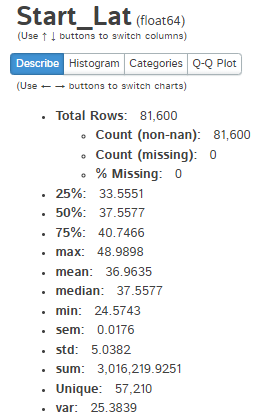 , 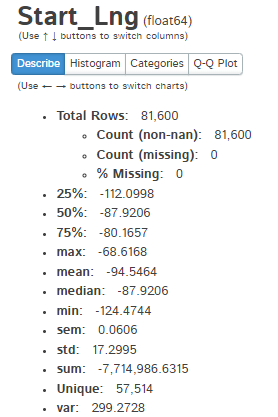 , 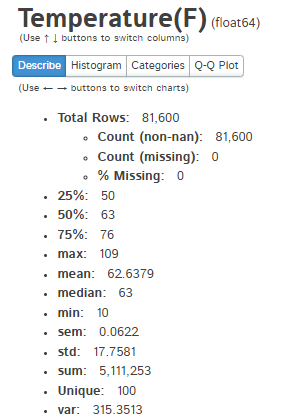 , 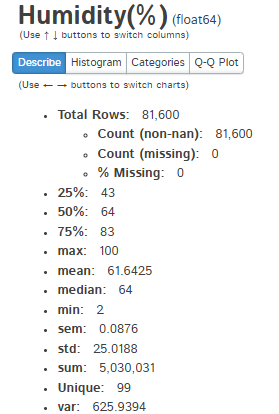

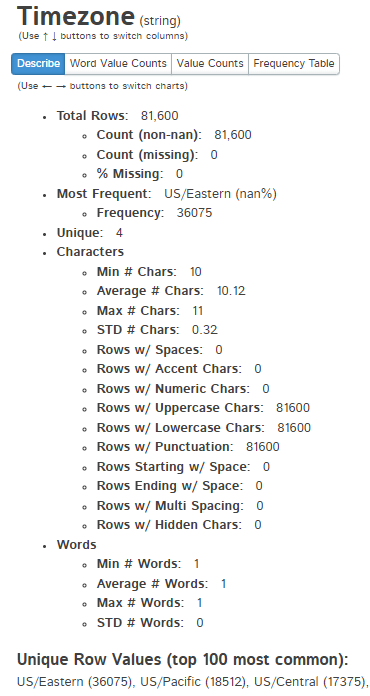 , 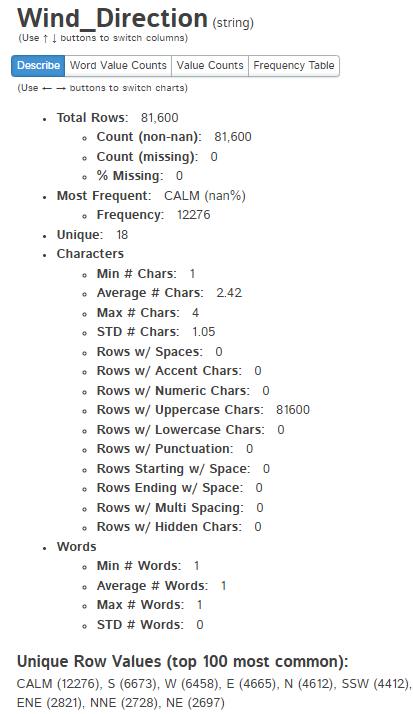 , 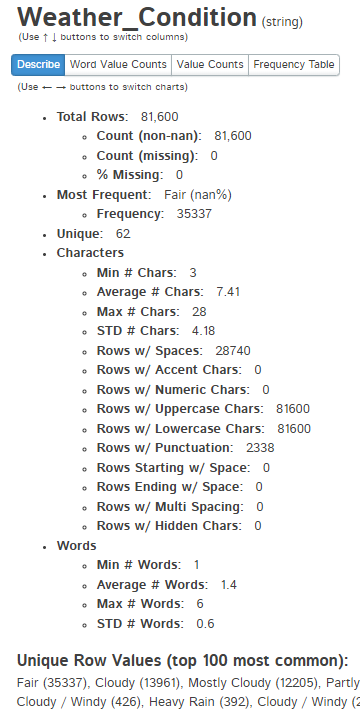

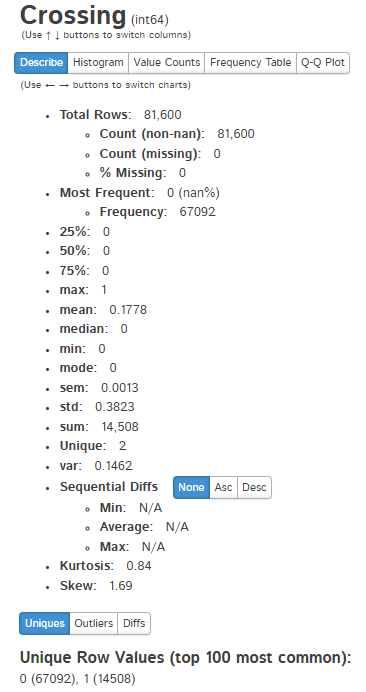 , 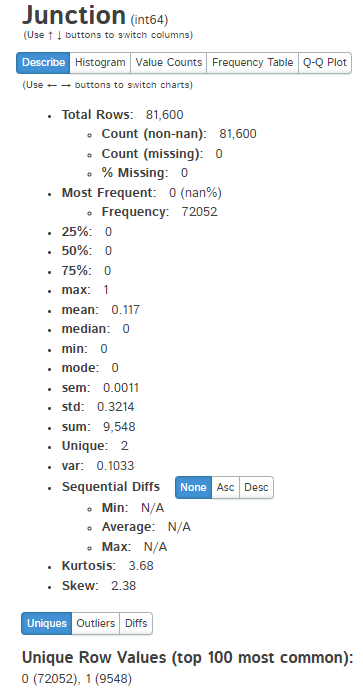 , 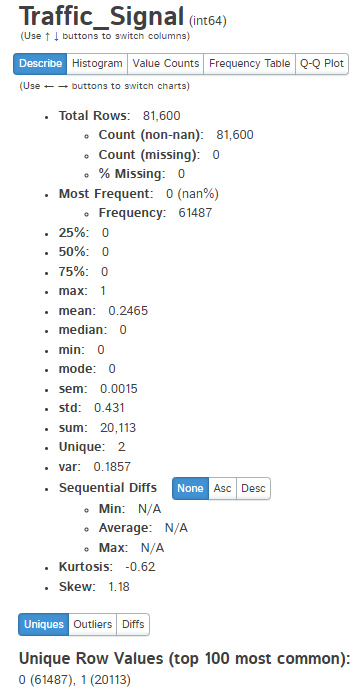

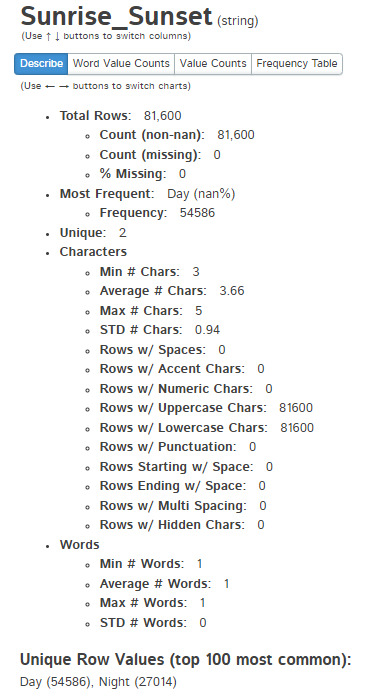 , 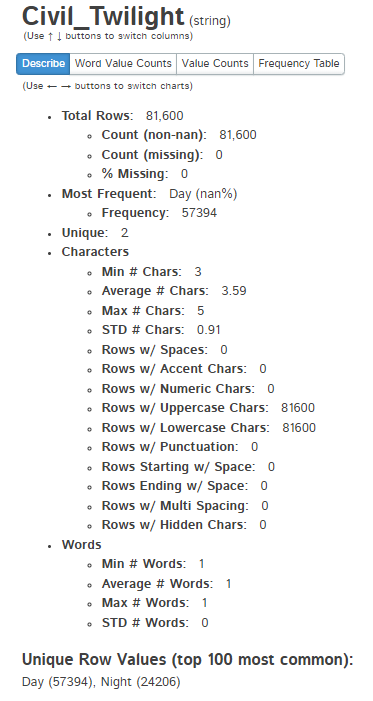 , 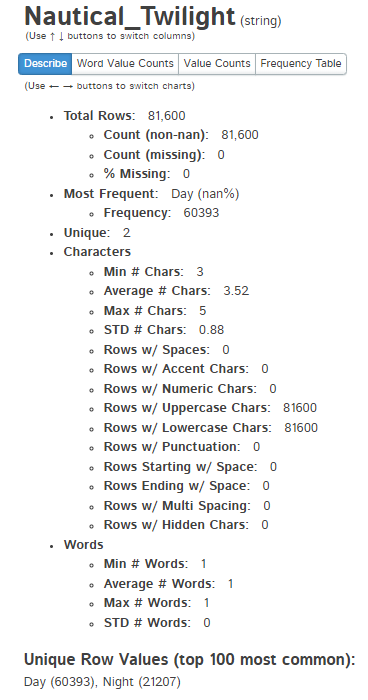

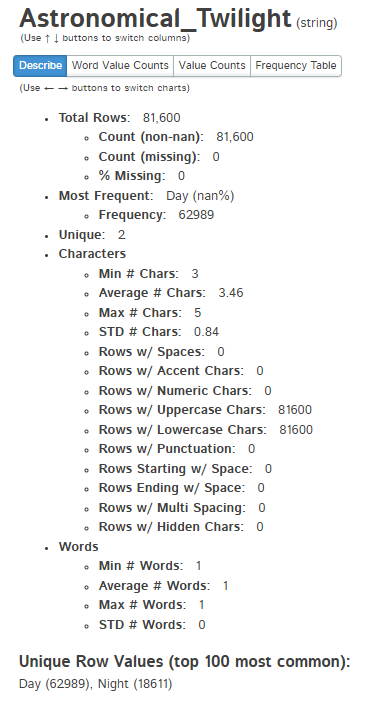 , 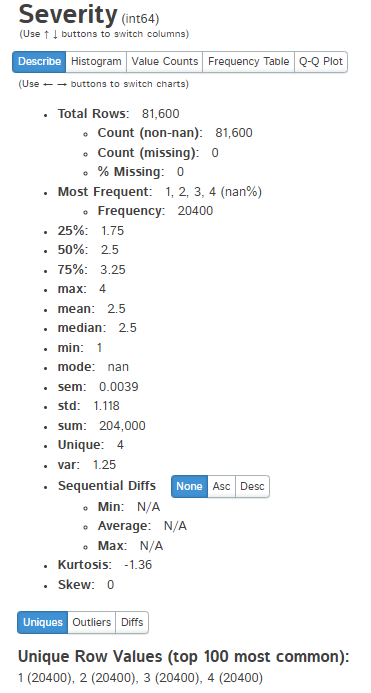

#### <span style="color:#ff5733">**Reporte ydata_profiling.**</span>

Entre las principales conclusiones, obtenidas en el reporte tenemos la correlación que existe entre las características, por lo cual deben seleccionarse cuidadosamente para evitar orverfitting en nuestro modelo, se dejan a continuación los comentarios:

- Astronomical_Twilight con alta correlación con: Civil_Twilight, Nautical_Twilight y Sunrise_Sunset, se debe seleecionar la que mejor correlacione con la clase a predecir (Severity), en este caso, se puede escoger cualquier, vamos a optar por **Civil_Twilight.**  

- Crossing con alta correlación con Traffic_Signal. Nos quedaremos con **Traffic_Signal.**

- Start_Lng con alta correlación con Timezone. Nos quedaremos con **Start_Lng.**

En este punto tenemos seleccionadas las caraterísticas Civil_Twilight, Traffic_Signal y Start_Lng.

Otra valiosa información del informe en el factor de correlación de la variable clase con las características, con lo cual, se puede cerrar con el grupo inicial de variables a considerar para nuestra modelo, vamos a listar el grupo de forma descendente por el factor de correlación.

- Start_Lng. 0.353
- Traffic_Signal. 0.326
- Civil_Twilight. 0.318
- Start_Lat. 0.212
- Temperature(F). 0.203
- Humidity(%). 0.189

Con repecto a valores atípicos, los mismos fueron revisados antes del balanceo de la data.
    



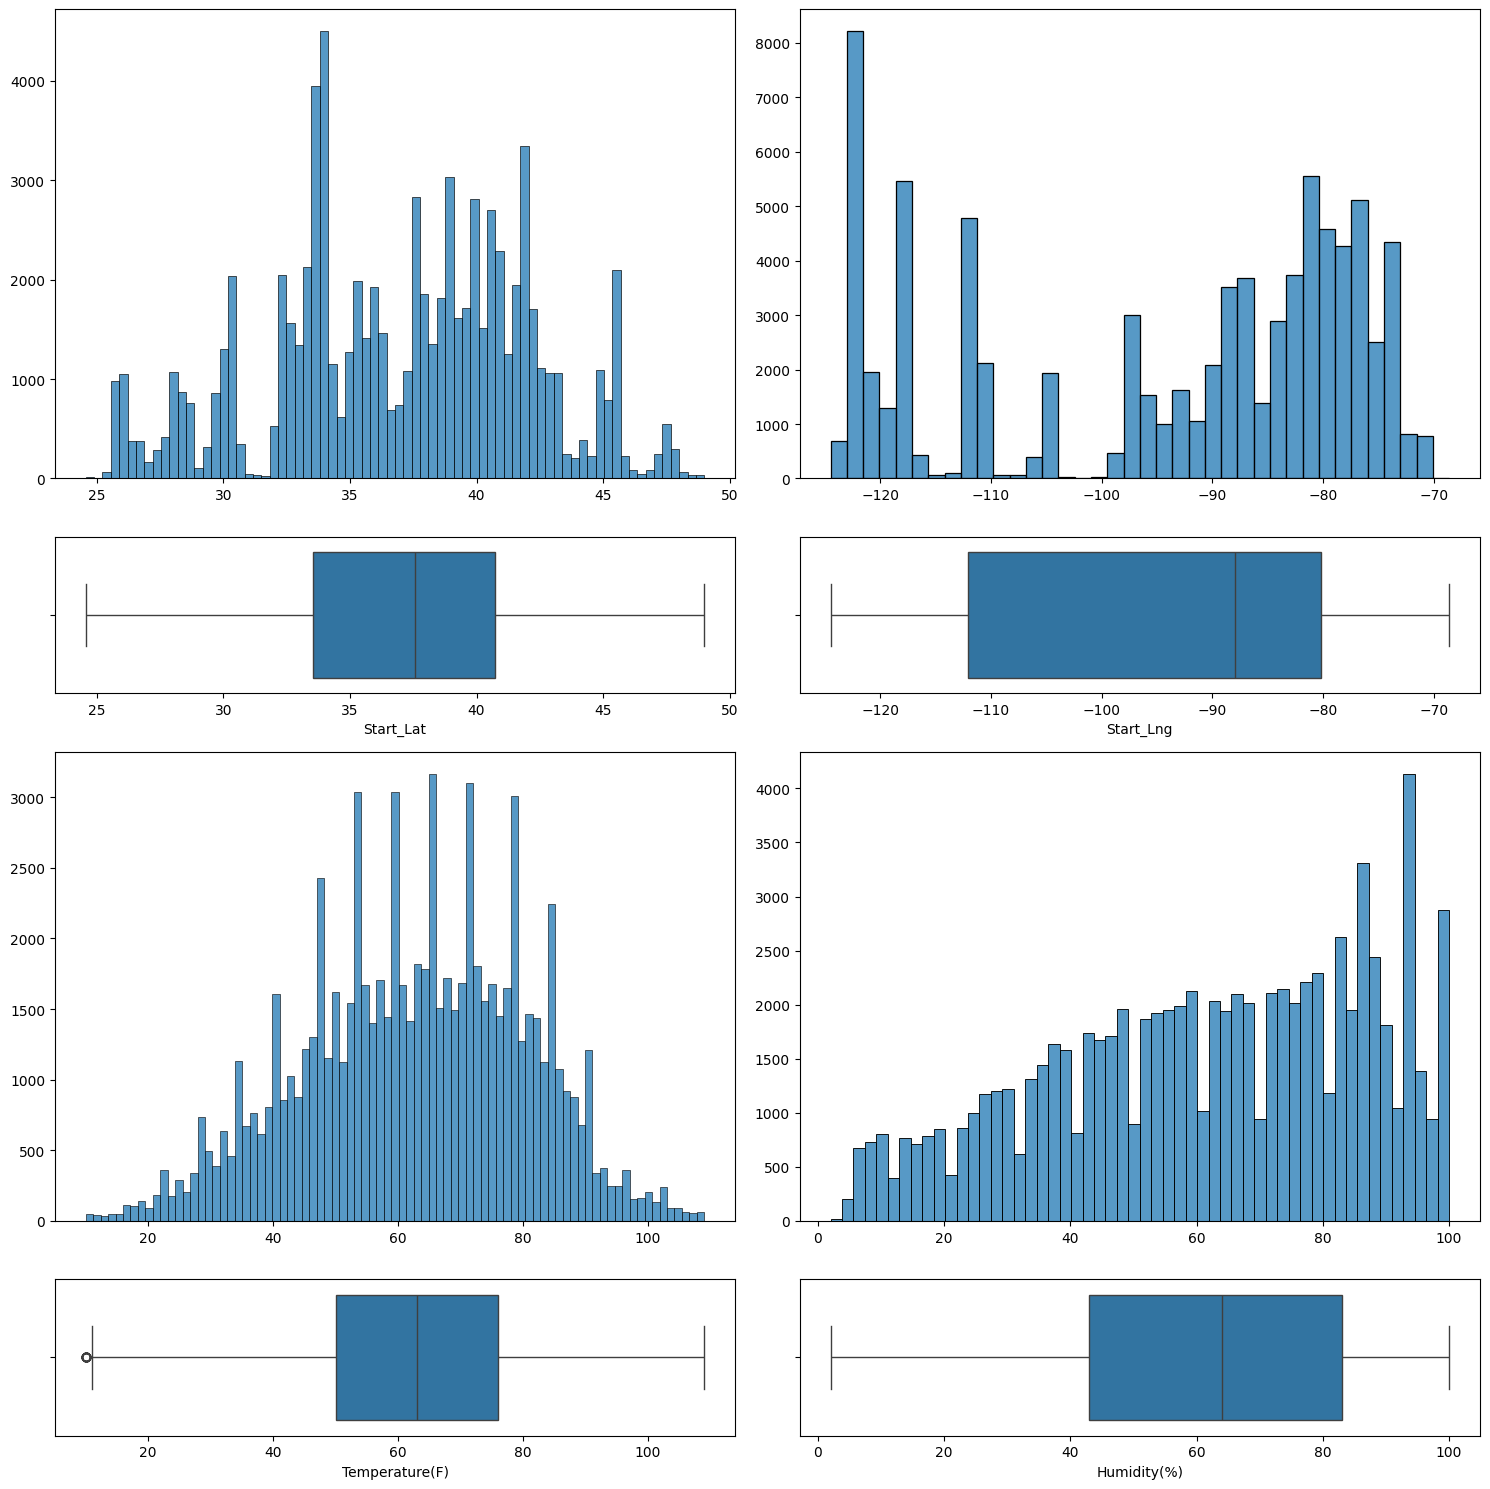

In [63]:
fig, axis = plt.subplots(4, 2, figsize = (15, 15), gridspec_kw={'height_ratios': [6,2,6,2]})
data=df_acc_bal
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "Start_Lat").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "Start_Lat")
sns.histplot(ax = axis[0, 1], data = data, x = "Start_Lng").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "Start_Lng")
sns.histplot(ax = axis[2, 0], data = data, x = "Temperature(F)").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "Temperature(F)")
sns.histplot(ax = axis[2, 1], data = data, x = "Humidity(%)").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "Humidity(%)")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

[Text(0.5, 0, 'Humidity(%)'), Text(0, 0.5, '')]

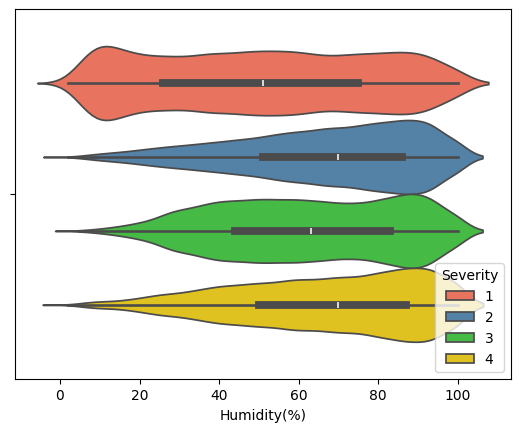

In [113]:
custom_palette = custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.violinplot(data = data, x = "Humidity(%)", hue='Severity', palette=custom_palette).set(xlabel = 'Humidity(%)', ylabel = None)
#sns.boxplot(data = data, x = "Temperature(F)")

In [64]:
# Generar el informe de perfilado
profile = ProfileReport(df_acc_bal, title="Informe DataSet de Accidentes USA con Clases Balanceadas en Severity", explorative=True)
# Mostrar en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
df_acc_bal.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Traffic_Signal_n', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity'],
      dtype='object')

#### <span style="color:#ff5733">**Analísis de Variables Multivariantes.**</span>

Vamos a visualizar como es la relación entre la clase Severity y el resto de las características. Iniciaremos con las características numéricas.

**Variables Numéricas y Clase Objetivo.**

- En este análisis queda por sentado la correlación existente entre estas variables y la clase a predecir, sin embargo; se nota que la misma es de media a baja (entre 0.20 y 0.26), va a depender como la combinación de las mismas pueda generar un modelo aceptable para predecir la clase Severity y por su puesto, como influirán las variables categóricas y booleanas en el estudio.

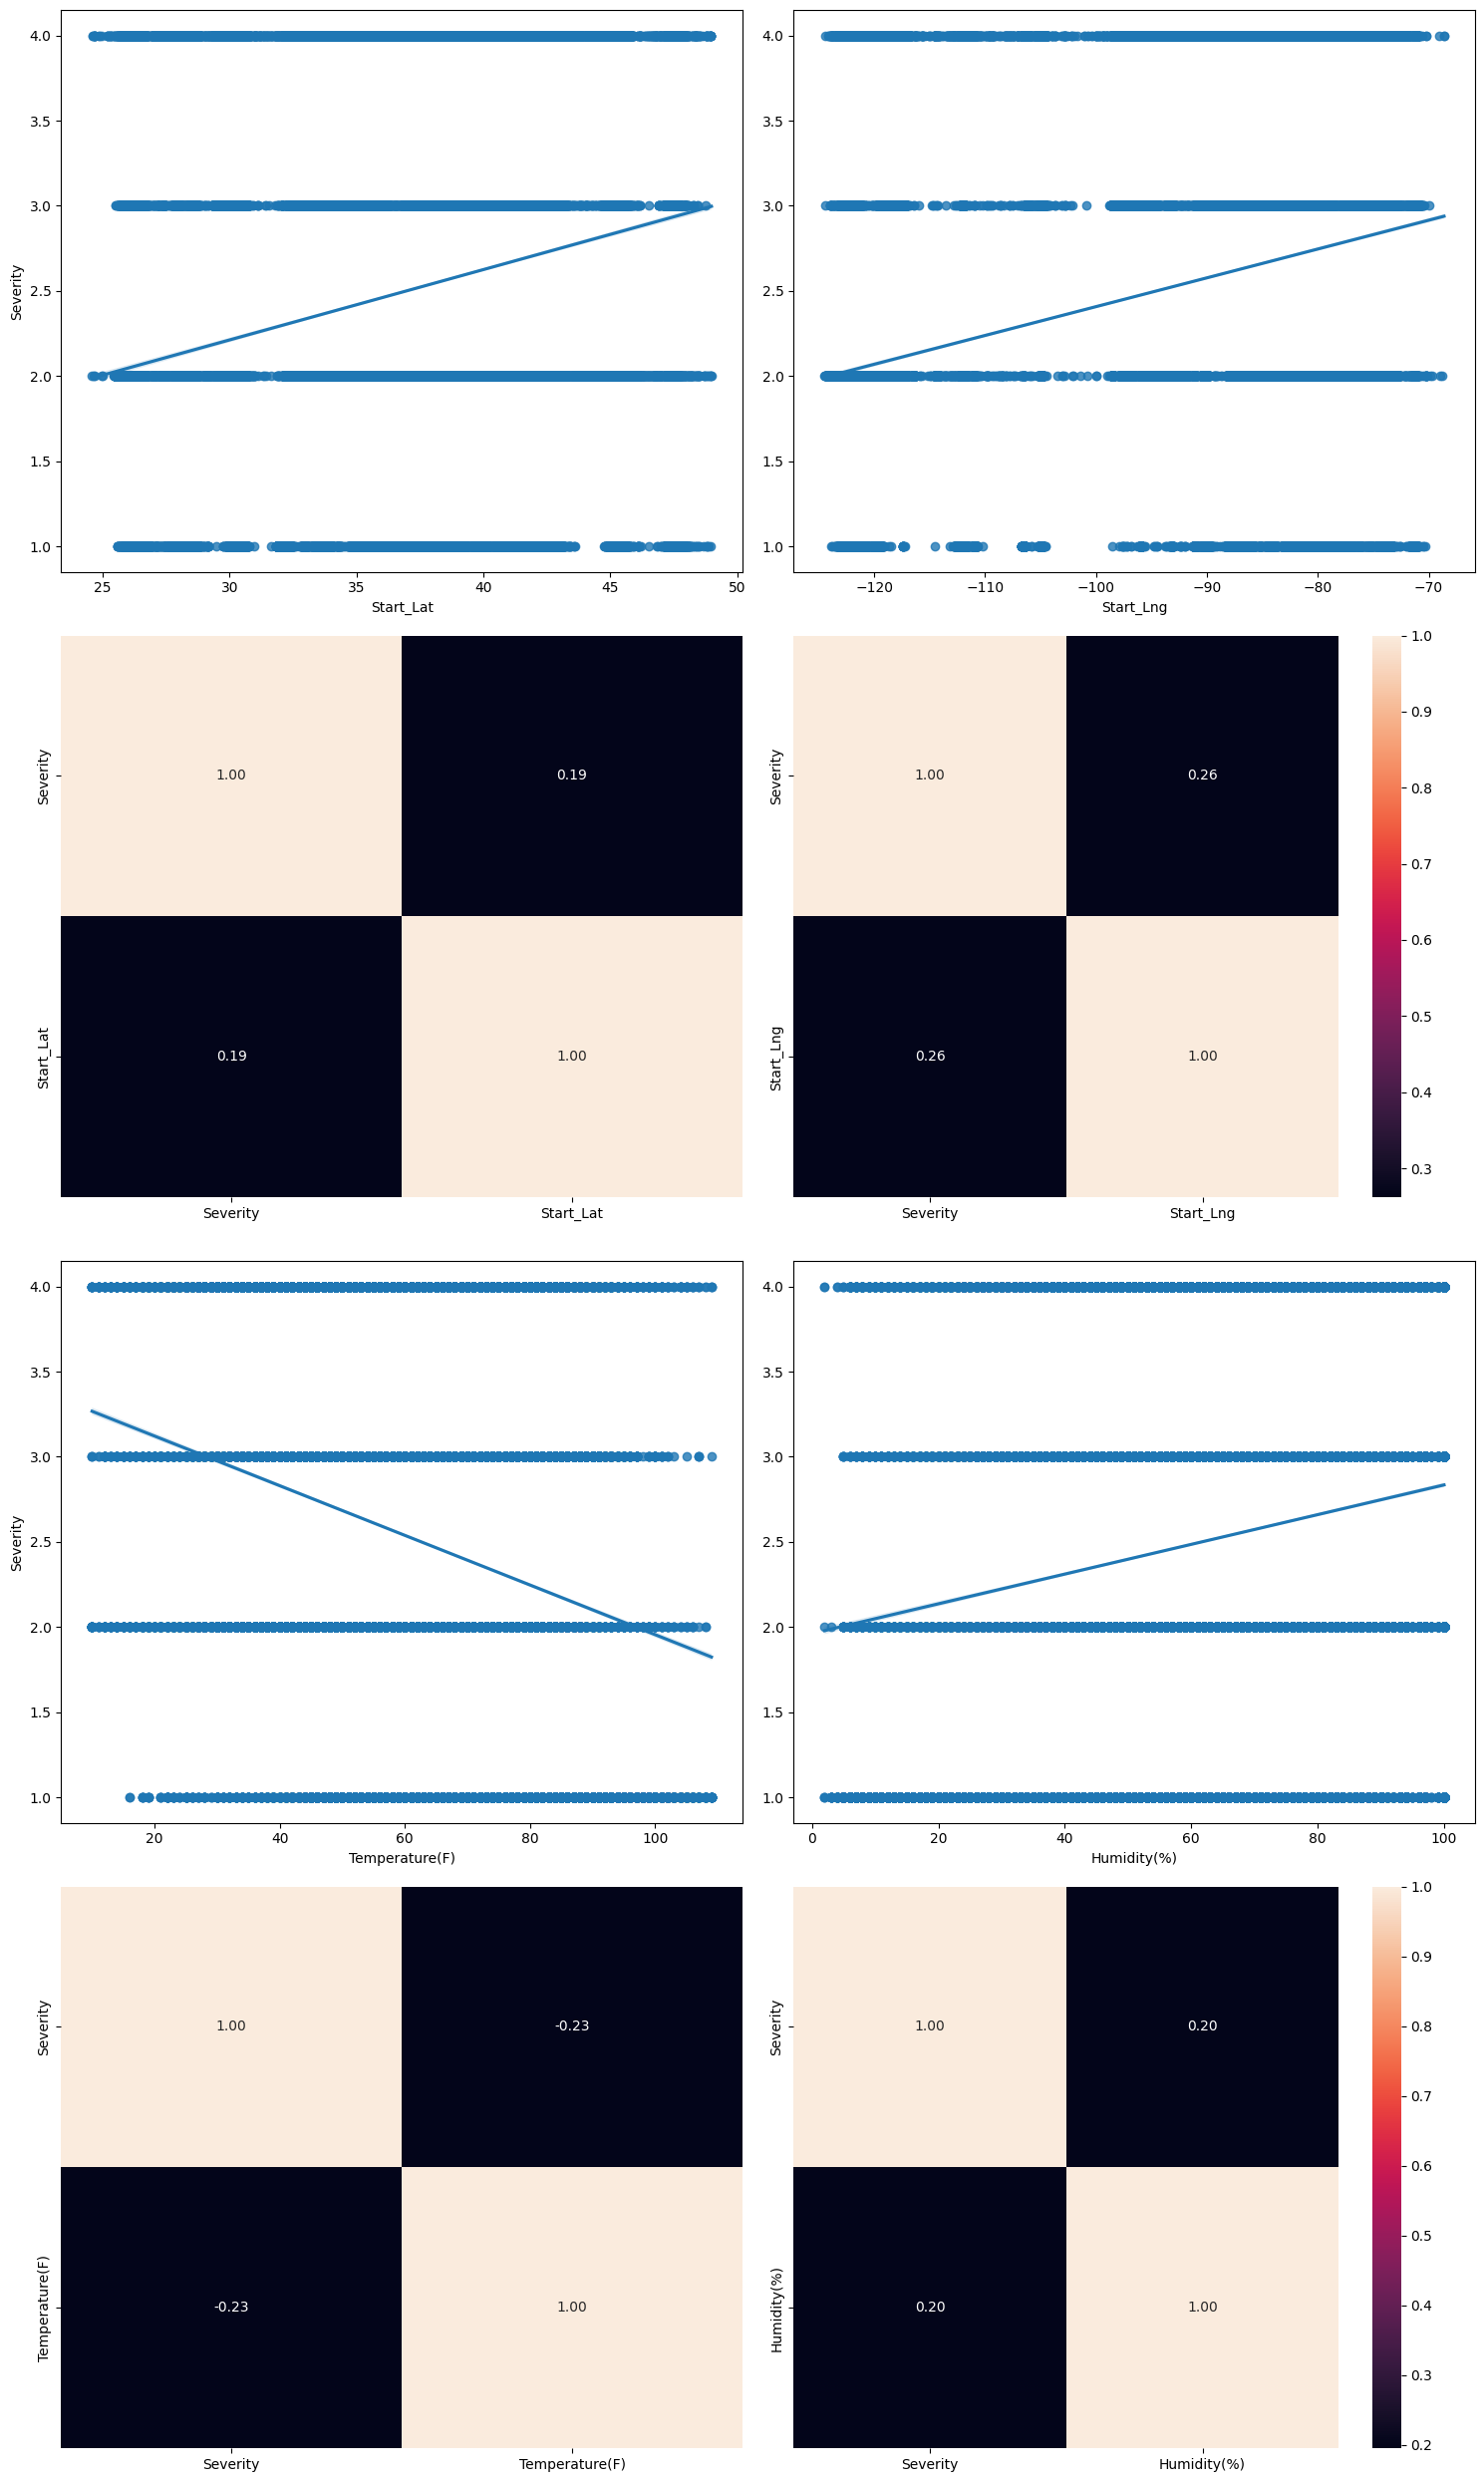

In [66]:

fig, axis = plt.subplots(4, 2, figsize = (15, 25))
data=df_acc_bal.copy()

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "Start_Lat", y = "Severity")
sns.heatmap(data[["Severity", "Start_Lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "Start_Lng", y = "Severity").set(ylabel=None)
sns.heatmap(data[["Severity", "Start_Lng"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "Temperature(F)", y = "Severity")
sns.heatmap(data[["Severity", "Temperature(F)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = data, x = "Humidity(%)", y = "Severity").set(ylabel=None)
sns.heatmap(data[["Severity", "Humidity(%)"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [67]:
df_acc_bal.columns

Index(['Start_Lat', 'Start_Lng', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Traffic_Signal', 'Traffic_Signal_n', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity'],
      dtype='object')

**Variables Categóricas, Booleanas y Clase a Predecir.**

Estos gráficos ponen de manifiesto como cambian los conteos de las clases en Severity cuando variamos las caracteristicas en uno de sus valores, por ejemplo, en Tiemezone se observa como la clase Severity arroja mayores conteos en la etiqueta US/Easterm. Iguales conclusiones pueden obtenerse del resto de los gráficos, pudiéndose inferir la presencia de alguna correlación entre ambas variables, la cual puede ser clarificada generando la tabla de correlaciones.

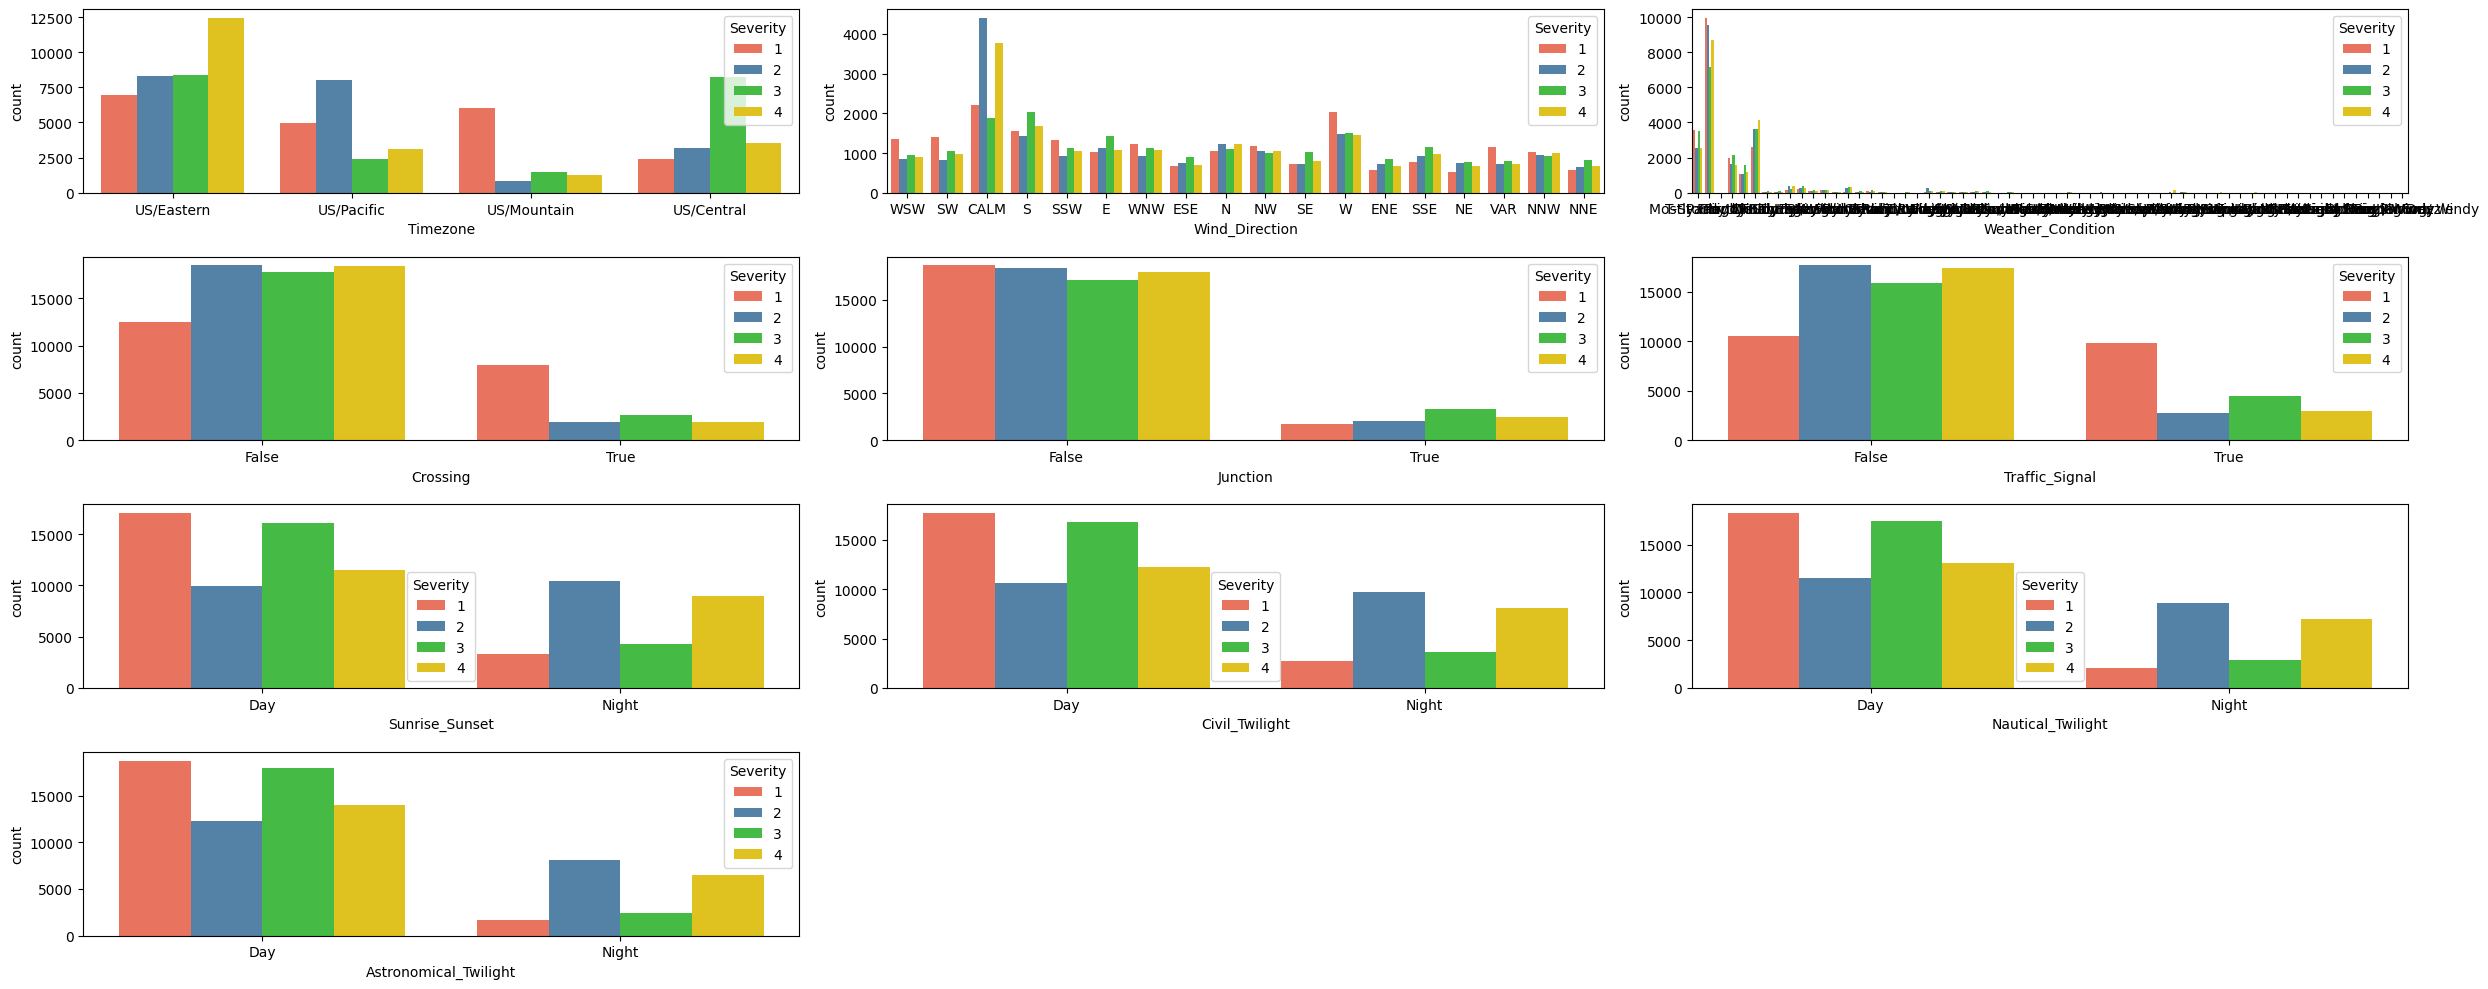

In [90]:
fig, axis = plt.subplots(4, 3, figsize = (25, 10))
custom_palette = custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

sns.countplot(ax = axis[0, 0], data = data, x ='Timezone',hue = 'Severity', palette=custom_palette)
sns.countplot(ax = axis[0, 1], data = data, x = 'Wind_Direction',hue = "Severity", palette=custom_palette)
sns.countplot(ax = axis[0, 2],data=data,x='Weather_Condition', hue='Severity', palette=custom_palette )
sns.countplot(ax = axis[1,0],data=data, x = 'Crossing',hue='Severity' , palette=custom_palette )
sns.countplot(ax = axis[1,1],data=data, x = 'Junction',hue='Severity', palette=custom_palette )
sns.countplot(ax = axis[1, 2], data = data, x = 'Traffic_Signal', hue = "Severity", palette=custom_palette)
sns.countplot(ax = axis[2, 0],data=data,x='Sunrise_Sunset', hue='Severity', palette=custom_palette )
sns.countplot(ax = axis[2, 1], data = data, x = 'Civil_Twilight', hue = "Severity", palette=custom_palette)
sns.countplot(ax = axis[2, 2],data=data,x='Nautical_Twilight', hue='Severity', palette=custom_palette )
sns.countplot(ax = axis[3, 0], data = data, x = 'Astronomical_Twilight', hue = "Severity", palette=custom_palette)

plt.tight_layout()
fig.delaxes(axis[3,1])
fig.delaxes(axis[3,2])

plt.show()

<Axes: xlabel='Civil_Twilight', ylabel='count'>

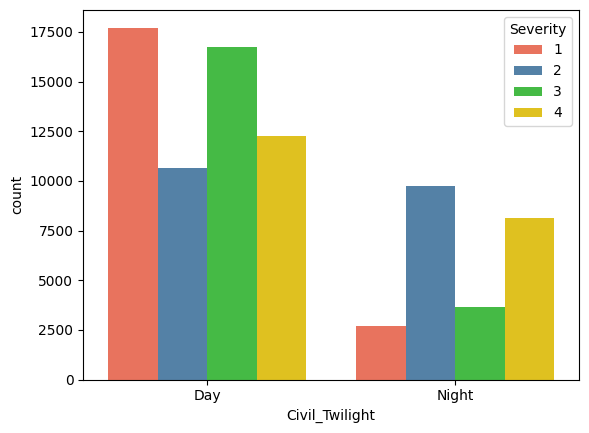

In [92]:
sns.countplot(data = data, x = 'Civil_Twilight', hue = "Severity", palette=custom_palette)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81600 entries, 971273 to 718691
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Start_Lat              81600 non-null  float64
 1   Start_Lng              81600 non-null  float64
 2   Timezone               81600 non-null  object 
 3   Temperature(F)         81600 non-null  float64
 4   Humidity(%)            81600 non-null  float64
 5   Wind_Direction         81600 non-null  object 
 6   Weather_Condition      81600 non-null  object 
 7   Crossing               81600 non-null  bool   
 8   Junction               81600 non-null  bool   
 9   Traffic_Signal         81600 non-null  bool   
 10  Traffic_Signal_n       81600 non-null  int64  
 11  Sunrise_Sunset         81600 non-null  object 
 12  Civil_Twilight         81600 non-null  object 
 13  Nautical_Twilight      81600 non-null  object 
 14  Astronomical_Twilight  81600 non-null  object 
 15  S

**Matriz de Correlacion de la Variable Clase y Variables Categóricas** 

Vamos a factorizar todas las variables categóricas que hagan falta para realizar la matriz.

En esta matriz se pone de manifiesto la alta correlación que existe entre las variables Sunrise_Sunset', Civil_Twilight','Nautical_Twilight' y 'Astronomical_Twilight'. De igual manera, entre las variables Crossing y Traffic_Signal. El analísis realizado con la salida de la librería ydata_profiling se ajusta a estos resultados.

In [70]:
#job marital education housing loan contact month y 
data["timezone_n"] = pd.factorize(data["Timezone"])[0]
data["Wind_Direction_n"] = pd.factorize(data["Wind_Direction"])[0]
data["Weather_Condition_n"] = pd.factorize(data["Weather_Condition"])[0]
data["Crossing_n"] = pd.factorize(data["Crossing"])[0]
data["Junction_n"] = pd.factorize(data["Junction"])[0]
data["Sunrise_Sunset_n"] = pd.factorize(data["Sunrise_Sunset"])[0]
data["Civil_Twilight_n"] = pd.factorize(data["Civil_Twilight"])[0]
data["Nautical_Twilight_n"] = pd.factorize(data["Nautical_Twilight"])[0]
data["Astronomical_Twilight_n"] = pd.factorize(data["Astronomical_Twilight"])[0]


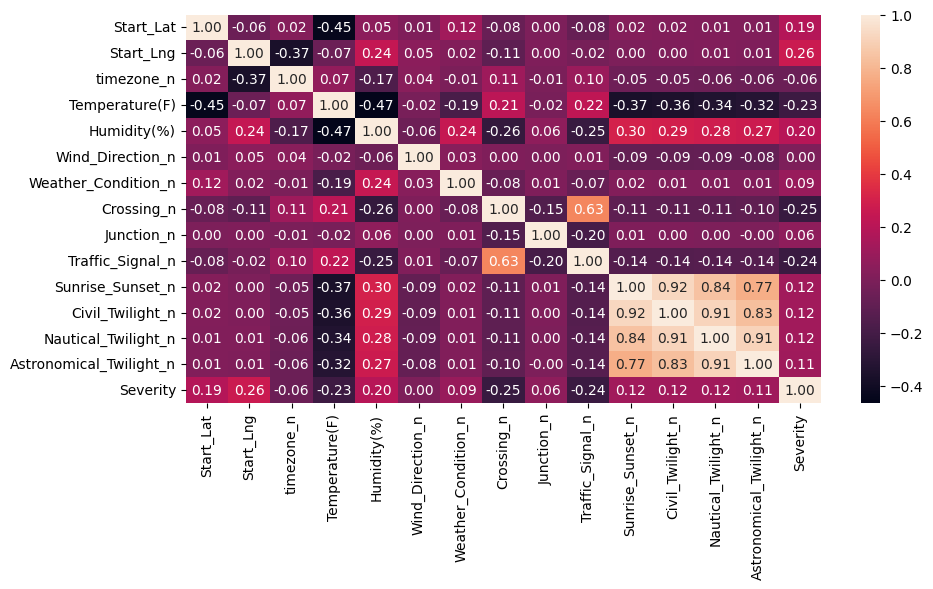

In [71]:
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data[['Start_Lat','Start_Lng', 'timezone_n','Temperature(F)', 'Humidity(%)', 'Wind_Direction_n','Weather_Condition_n', 
                  'Crossing_n', 'Junction_n', 'Traffic_Signal_n', 'Sunrise_Sunset_n',
                   'Civil_Twilight_n','Nautical_Twilight_n','Astronomical_Twilight_n','Severity']].corr()

#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [72]:
data.to_csv('../data/interim/data_graf.csv', index=False)

#### <span style="color:#ff5733">**Ingeniería de Características. Preprocesado final de la data para el Modelo.**</span>

##### <span style="color:#FFC30F">**Selección de Variables para el Modelo.**</span>

In [73]:
#Posibles Variables del Modelo
var_f=['Start_Lat', 'Start_Lng','Traffic_Signal_n','Civil_Twilight_n','Temperature(F)','Humidity(%)']

# Agregamos la caracteristica Civil_Twilight_n al dataframe df_acc_bal para poder usarla en el modelo
df_acc_bal['Civil_Twilight_n']=data['Civil_Twilight_n']
df_acc_bal['Crossing_n']=data['Crossing_n']

X_f=df_acc_bal[var_f]
y_f=df_acc_bal['Severity']
X_f.head()

Start_Lat  Start_Lng  Traffic_Signal_n  Civil_Twilight_n  \
971273    35.69608  -78.58331                 0                 0   
978083    38.24065 -122.09096                 0                 1   
1076895   33.45882 -112.18647                 1                 0   
1067432   37.51938  -77.51614                 1                 0   
1069833   28.46157  -82.54023                 1                 0   

         Temperature(F)  Humidity(%)  
971273             88.0         65.0  
978083             56.0         87.0  
1076895            54.0         51.0  
1067432            64.0        100.0  
1069833            92.0         48.0

##### <span style="color:#FFC30F">**División de los Conjuntos Train y Test y Escalado de Características.**</span>

In [74]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42)


In [75]:
X_train.head()

Start_Lat   Start_Lng  Traffic_Signal_n  Civil_Twilight_n  \
1066697  38.786920  -77.177380                 0                 1   
683882   42.081562  -76.219605                 0                 1   
497033   36.496077  -87.176481                 0                 1   
944498   37.851850 -121.282880                 0                 1   
868941   40.805753  -73.243992                 0                 1   

         Temperature(F)  Humidity(%)  
1066697            61.0         94.0  
683882             42.0         96.0  
497033             31.0         73.0  
944498             65.0         65.0  
868941             46.0         86.0

In [76]:
# Escalado de Características
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# convertir y_train y y_test en DataFrame
column_names = ['Start_Lat', 'Start_Lng', 'Traffic_Signal', 'Civil_Twilight', 'Temperature(F)', 'Humidity(%)']

X_train_scaled=pd.DataFrame(X_train_scaled, columns=column_names)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=column_names )
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [78]:
X_train_scaled.head()

Start_Lat  Start_Lng  Traffic_Signal  Civil_Twilight  Temperature(F)  \
0   0.582115   0.846743             0.0             1.0        0.515152   
1   0.717055   0.863890             0.0             1.0        0.323232   
2   0.488287   0.667733             0.0             1.0        0.212121   
3   0.543816   0.057136             0.0             1.0        0.555556   
4   0.664801   0.917162             0.0             1.0        0.363636   

   Humidity(%)  
0     0.938776  
1     0.959184  
2     0.724490  
3     0.642857  
4     0.857143

#### <span style="color:#ff5733">**Almacenando Valores Preprocesados.**</span>

##### **Data con Escalamiento.**

In [79]:
conn = sqlite3.connect('accidentes_usa.db')
cursor_obj = conn.cursor()

### Carga masiva de los registros en la tabla X_train
X_train_scaled.to_sql('X_train', conn, if_exists='replace', index=False)
X_test_scaled.to_sql('X_test', conn, if_exists='replace', index=False)
y_train.to_sql('y_train', conn, if_exists='replace', index=False)
y_test.to_sql('y_test', conn, if_exists='replace', index=False)
# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()


##### **Data sin Escalamiento y Reducidos para Despliegue con Streamlit y Render.**

- Se van a generar estos grupos de train y test para poder usar la versión free de Render por efectos de memoria asignada para los proyectos que es de 512 MB, solo para usos académicos.

In [80]:
X_f.shape

(81600, 6)

In [81]:
X_f_r=X_f.sample(n=10000, random_state=42)
X_f_r.shape

(10000, 6)

In [82]:

y_f_r=y_f.sample(n=10000, random_state=42)
y_f_r.shape

(10000,)

In [83]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_f_r, y_f_r, test_size=0.2, random_state=42)

In [84]:
conn = sqlite3.connect('accidentes_usa.db')
cursor_obj = conn.cursor()

### Carga masiva de los registros en la tabla X_train
X_train_r.to_sql('X_train_r_sin_scal', conn, if_exists='replace', index=False)
X_test_r.to_sql('X_test_r_sin_scal', conn, if_exists='replace', index=False)
y_train_r.to_sql('y_train_r_sin_scal', conn, if_exists='replace', index=False)
y_test_r.to_sql('y_test_r_sin_scal', conn, if_exists='replace', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()
